In [1]:

import warnings

# Suppress DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)




# **Import dataset**

In [2]:
import pandas as pd
# Read product data
products_df = pd.read_csv('prod_cat_info.csv')
# Read customer profiles
customers_df = pd.read_csv('Customer.csv')
# Read Transactions history
Transactions_df = pd.read_csv('Transactions.csv')

In [3]:
products_df

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [4]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 868.0+ bytes


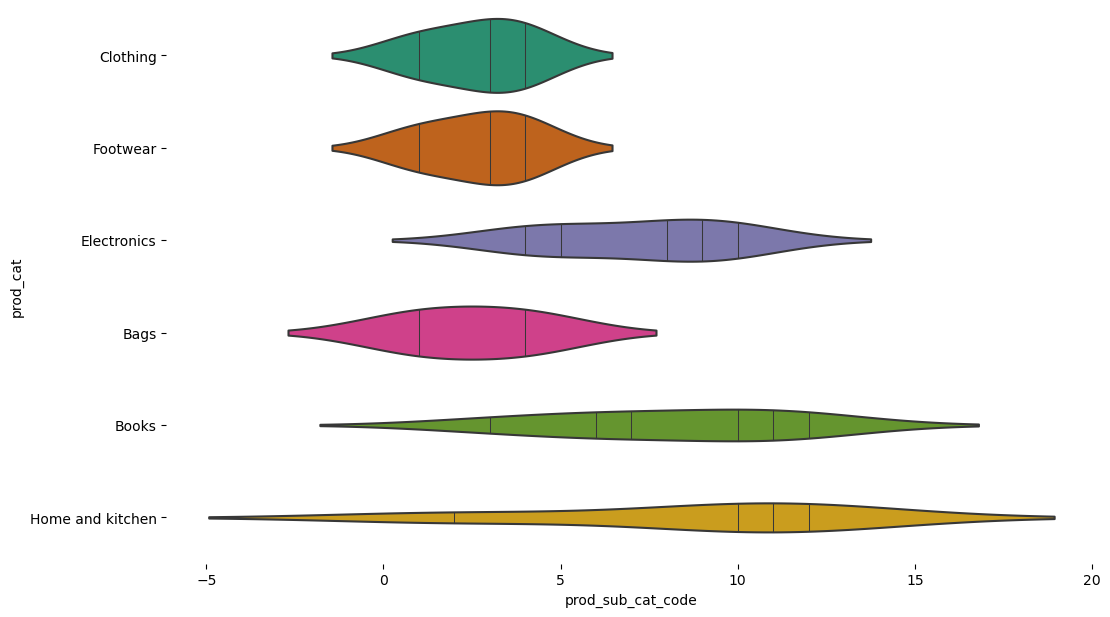

In [5]:


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(products_df['prod_cat'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(products_df, x='prod_sub_cat_code', y='prod_cat', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

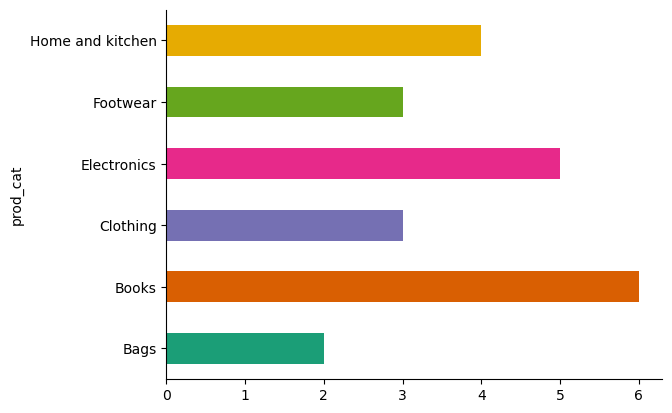

In [6]:


from matplotlib import pyplot as plt
import seaborn as sns
products_df.groupby('prod_cat').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
customers_df

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


# **Check and handle missing values**

In [8]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [9]:
customers_df.isnull().sum()/len(customers_df)*100

customer_Id    0.000000
DOB            0.000000
Gender         0.035417
city_code      0.035417
dtype: float64

In [10]:
# handle customers_df missing values

customers_df['Gender'].fillna(customers_df['Gender'].mode()[0], inplace=True)
customers_df['city_code'].fillna(customers_df['city_code'].mean(), inplace=True)



In [11]:
customers_df.isnull().sum()/len(customers_df)*100

customer_Id    0.0
DOB            0.0
Gender         0.0
city_code      0.0
dtype: float64

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5647 non-null   object 
 3   city_code    5647 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [13]:
customers_df.describe()

,customer_Id,city_code
count,5647.000000,5647.000000
mean,271037.281034,5.472631
std,2451.261711,2.859412
min,266783.000000,1.000000
25%,268912.000000,3.000000
50%,271028.000000,5.000000
75%,273180.000000,8.000000
max,275265.000000,10.000000


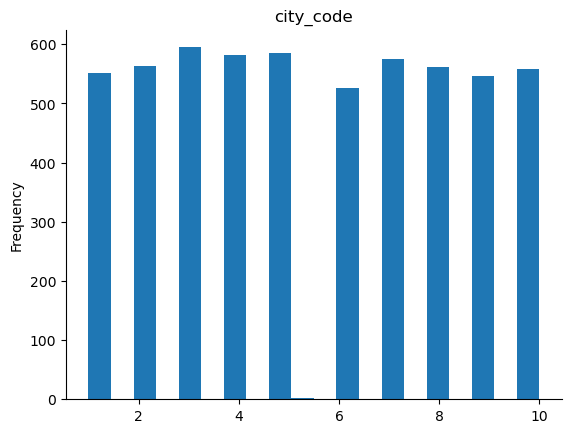

In [14]:

from matplotlib import pyplot as plt
customers_df['city_code'].plot(kind='hist', bins=20, title='city_code')
plt.gca().spines[['top', 'right',]].set_visible(False)

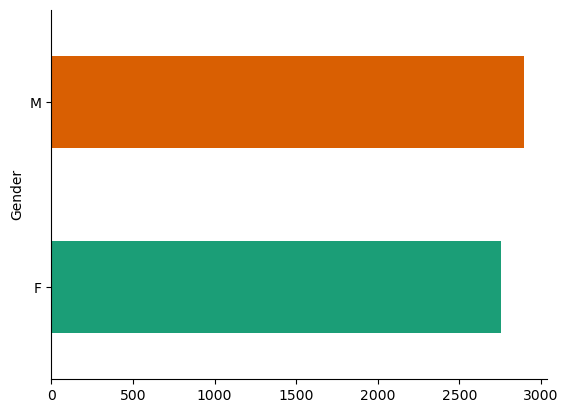

In [15]:


from matplotlib import pyplot as plt
import seaborn as sns
customers_df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
customers_df.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [17]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5647 non-null   object 
 3   city_code    5647 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [18]:
# prompt: customers_df['DOB'] this column convert to data formaeat  i have formate for date monthe year

customers_df['DOB'] = pd.to_datetime(customers_df['DOB'], format="%d-%m-%Y")


In [19]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5647 non-null   int64         
 1   DOB          5647 non-null   datetime64[ns]
 2   Gender       5647 non-null   object        
 3   city_code    5647 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 176.6+ KB


In [20]:
# prompt: customers_df['DOB'] generate the column using curent date make Age column

import datetime

customers_df['DOB'] = pd.to_datetime(customers_df['DOB'], format="%d-%m-%Y")
customers_df['Current_date'] = datetime.datetime.now()
customers_df['Age'] = (customers_df['Current_date'] - customers_df['DOB']).dt.days // 365

customers_df.drop('Current_date', axis=1, inplace=True)


In [21]:
customers_df['Age'].value_counts()

Age
44    271
36    270
35    267
49    258
46    253
41    252
48    248
34    247
47    247
53    247
42    246
52    245
39    245
32    244
45    239
37    239
50    238
38    237
33    235
40    229
51    227
43    227
31    126
54    110
Name: count, dtype: int64

In [22]:
customers_df

,customer_Id,DOB,Gender,city_code,Age
0,268408,1970-01-02,M,4.0,54
1,269696,1970-01-07,F,8.0,54
2,268159,1970-01-08,F,8.0,54
3,270181,1970-01-10,F,2.0,54
4,268073,1970-01-11,M,1.0,54
...,...,...,...,...,...
5642,274474,1992-12-19,M,2.0,31
5643,267666,1992-12-24,M,6.0,31
5644,270476,1992-12-25,F,3.0,31
5645,269626,1992-12-27,F,5.0,31


In [23]:
# prompt: customers_df ['customer_Id'] column name chenge cust_id  and Gender column chenge M = Male, F=Female

customers_df.rename(columns={'customer_Id': 'cust_id'}, inplace=True)
customers_df['Gender'] = customers_df['Gender'].replace(['M', 'F'], ['Male', 'Female'])
customers_df


,cust_id,DOB,Gender,city_code,Age
0,268408,1970-01-02,Male,4.0,54
1,269696,1970-01-07,Female,8.0,54
2,268159,1970-01-08,Female,8.0,54
3,270181,1970-01-10,Female,2.0,54
4,268073,1970-01-11,Male,1.0,54
...,...,...,...,...,...
5642,274474,1992-12-19,Male,2.0,31
5643,267666,1992-12-24,Male,6.0,31
5644,270476,1992-12-25,Female,3.0,31
5645,269626,1992-12-27,Female,5.0,31


In [24]:
products_df.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [25]:
products_df.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [26]:
Transactions_df.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [27]:
# prompt: Transactions_df['prod_subcat_code'] chenge the column name  prod_sub_cat_code

Transactions_df.rename(columns={'prod_subcat_code': 'prod_sub_cat_code'}, inplace=True)


In [28]:
Transactions_df.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [29]:
import pandas as pd

prod_cat_mapping = dict(zip(products_df['prod_cat_code'], products_df['prod_cat']))

Transactions_df['prod_cat'] = Transactions_df['prod_cat_code'].map(prod_cat_mapping)


prod_subcat_mapping = dict(zip(products_df['prod_sub_cat_code'], products_df['prod_subcat']))

Transactions_df['prod_subcat'] = Transactions_df['prod_sub_cat_code'].map(prod_subcat_mapping)

In [30]:
Transactions_df

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Mens
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Tools
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Women
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Bath


In [31]:
# prompt: Transactions_df concate  prod_cat and  prod_subcat withe space

Transactions_df['prod_cat_subcat'] = Transactions_df['prod_cat'] + ' ' + Transactions_df['prod_subcat']
Transactions_df


,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,prod_cat_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Mens,Clothing Mens
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,Electronics Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,Books DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,Home and kitchen Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,Books DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Tools,Books Tools
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Women,Clothing Women
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,Home and kitchen Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Bath,Books Bath


In [32]:
Transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   cust_id            23053 non-null  int64  
 2   tran_date          23053 non-null  object 
 3   prod_sub_cat_code  23053 non-null  int64  
 4   prod_cat_code      23053 non-null  int64  
 5   Qty                23053 non-null  int64  
 6   Rate               23053 non-null  int64  
 7   Tax                23053 non-null  float64
 8   total_amt          23053 non-null  float64
 9   Store_type         23053 non-null  object 
 10  prod_cat           23053 non-null  object 
 11  prod_subcat        23053 non-null  object 
 12  prod_cat_subcat    23053 non-null  object 
dtypes: float64(2), int64(6), object(5)
memory usage: 2.3+ MB


In [33]:
Transactions_df.isnull().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_sub_cat_code    0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
prod_cat             0
prod_subcat          0
prod_cat_subcat      0
dtype: int64

In [34]:
Transactions_df.describe()

,transaction_id,cust_id,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


In [35]:
print('Total unique cust_id : ',Transactions_df['cust_id'].unique().shape[0])
print('Total unique prod_cat_code : ',Transactions_df['prod_cat_code'].unique().shape[0])
print('Total unique prod_subcat_code : ',Transactions_df['prod_sub_cat_code'].unique().shape[0])

Total unique cust_id :  5506
Total unique prod_cat_code :  6
Total unique prod_subcat_code :  12


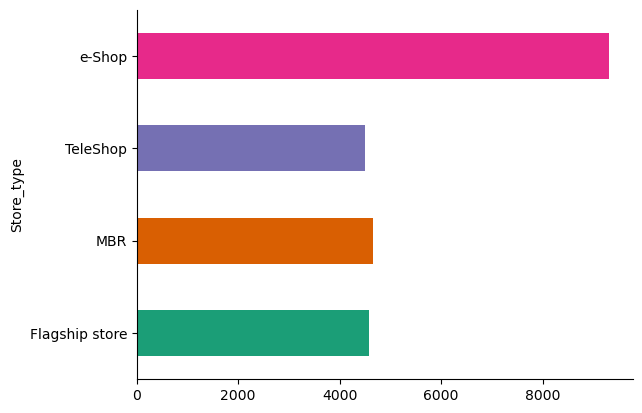

In [36]:


from matplotlib import pyplot as plt
import seaborn as sns
Transactions_df.groupby('Store_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

C:\Users\USER\AppData\Local\Temp\ipykernel_4172\1341859745.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Transactions_df['Qty'], color='g', bins=100, hist_kws={'alpha': 0.5})


<Axes: xlabel='Qty', ylabel='Density'>

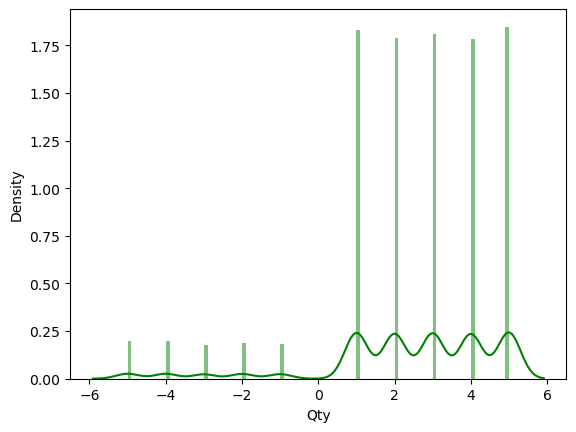

In [37]:
# prompt: Qty distibution plot

sns.distplot(Transactions_df['Qty'], color='g', bins=100, hist_kws={'alpha': 0.5})


In [38]:
# Quntity value counts

Total_unique_Qty_value_counts=Transactions_df['Qty'].value_counts().sort_values(ascending=False)
print(Total_unique_Qty_value_counts)


Qty
 5    4259
 1    4214
 3    4174
 2    4123
 4    4106
-4     458
-5     457
-2     438
-1     419
-3     405
Name: count, dtype: int64


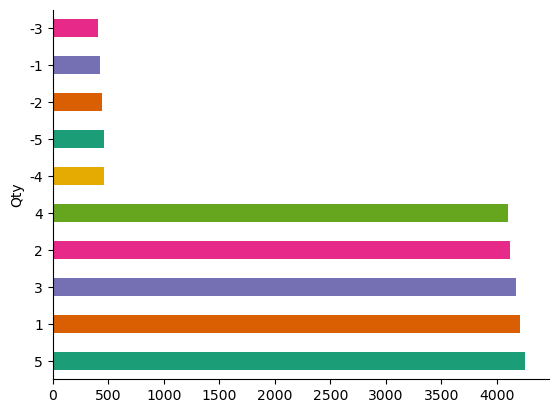

In [39]:
# Quntity bar chart
Total_unique_Qty_value_counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

High sales but low returns for some products: 5 sells well with low returns, 1 & 3 similar, 2 & 4 have low sales but high returns.

In [40]:
# count of quntity total pasitive & negative
total_count = Transactions_df['Qty'].count()
positive_count = Transactions_df[Transactions_df['Qty'] > 0]['Qty'].count()
negative_count = Transactions_df[Transactions_df['Qty'] < 0]['Qty'].count()

print("Total count:", total_count)
print("Positive count:", positive_count)
print("Negative count:", negative_count)



Total count: 23053
Positive count: 20876
Negative count: 2177


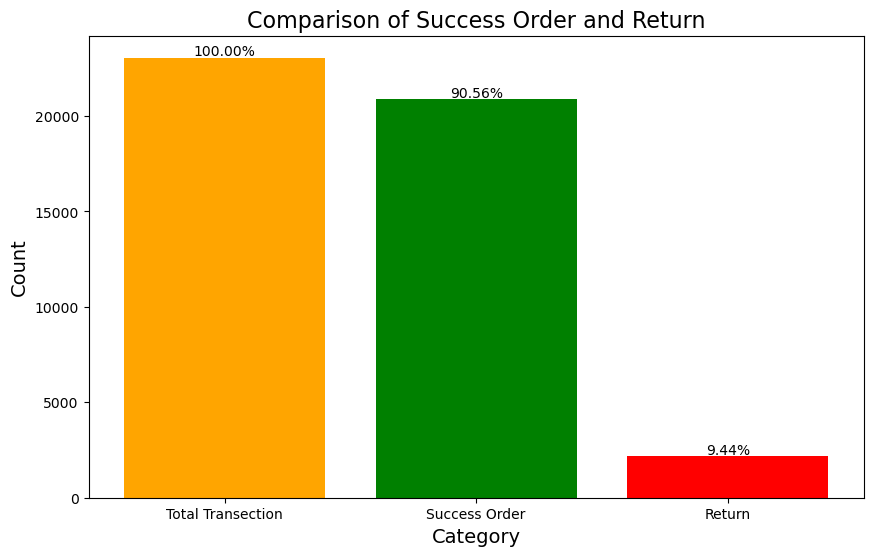

In [41]:
# Create the data
labels = ["Total Transection", "Success Order","Return"]
values = [total_count, positive_count, negative_count]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
ax.bar(labels, values, color=['orange', 'green', 'red'])

# Add value labels on top of the bars
for i, value in enumerate(values):
    percentage = (value / total_count) * 100
    ax.annotate(f"{percentage:.2f}%", xy=(i, value - 50), ha='center', va='bottom')

# Set the title and axis labels
ax.set_title("Comparison of Success Order and Return", fontsize=16)
ax.set_xlabel("Category", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Show the plot
plt.show()


In [42]:
customers_df

,cust_id,DOB,Gender,city_code,Age
0,268408,1970-01-02,Male,4.0,54
1,269696,1970-01-07,Female,8.0,54
2,268159,1970-01-08,Female,8.0,54
3,270181,1970-01-10,Female,2.0,54
4,268073,1970-01-11,Male,1.0,54
...,...,...,...,...,...
5642,274474,1992-12-19,Male,2.0,31
5643,267666,1992-12-24,Male,6.0,31
5644,270476,1992-12-25,Female,3.0,31
5645,269626,1992-12-27,Female,5.0,31


# **Merge two datasets**

In [43]:
data = pd.merge(Transactions_df, customers_df, on='cust_id', how='left')
data


,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,prod_cat_subcat,DOB,Gender,city_code,Age
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Mens,Clothing Mens,1981-09-26,Male,5.0,42
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,Electronics Computers,1973-05-11,Female,8.0,51
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,Books DIY,1992-07-27,Male,8.0,31
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,Home and kitchen Bath,1981-06-08,Male,3.0,43
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,Books DIY,1992-07-27,Male,8.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Tools,Books Tools,1972-02-21,Male,7.0,52
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Women,Clothing Women,1984-04-27,Male,9.0,40
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,Home and kitchen Furnishing,1976-06-20,Male,8.0,48
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Bath,Books Bath,1970-05-22,Male,2.0,54


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23053 non-null  int64         
 1   cust_id            23053 non-null  int64         
 2   tran_date          23053 non-null  object        
 3   prod_sub_cat_code  23053 non-null  int64         
 4   prod_cat_code      23053 non-null  int64         
 5   Qty                23053 non-null  int64         
 6   Rate               23053 non-null  int64         
 7   Tax                23053 non-null  float64       
 8   total_amt          23053 non-null  float64       
 9   Store_type         23053 non-null  object        
 10  prod_cat           23053 non-null  object        
 11  prod_subcat        23053 non-null  object        
 12  prod_cat_subcat    23053 non-null  object        
 13  DOB                23053 non-null  datetime64[ns]
 14  Gender

# **Remove unwanted columns**

In [45]:

data=data.drop(columns=['transaction_id','tran_date','Rate','Tax','total_amt','DOB','prod_cat_code','prod_sub_cat_code','prod_cat','prod_subcat'])
data

,cust_id,Qty,Store_type,prod_cat_subcat,Gender,city_code,Age
0,270351,-5,e-Shop,Clothing Mens,Male,5.0,42
1,270384,-5,e-Shop,Electronics Computers,Female,8.0,51
2,273420,-2,TeleShop,Books DIY,Male,8.0,31
3,271509,-3,e-Shop,Home and kitchen Bath,Male,3.0,43
4,273420,-2,TeleShop,Books DIY,Male,8.0,31
...,...,...,...,...,...,...,...
23048,274550,1,e-Shop,Books Tools,Male,7.0,52
23049,270022,1,e-Shop,Clothing Women,Male,9.0,40
23050,271020,4,MBR,Home and kitchen Furnishing,Male,8.0,48
23051,270911,3,TeleShop,Books Bath,Male,2.0,54


# **Check Duplicate Rrows**

In [46]:

duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])


Number of duplicate rows: 197


# **Remove Dublicates**

In [47]:

data = data.drop_duplicates()
duplicate_rows = data[data.duplicated()]
duplicate_rows.shape[0]


0

# **Rest The Index Data**

In [48]:

data = data.reset_index(drop=True)
data

,cust_id,Qty,Store_type,prod_cat_subcat,Gender,city_code,Age
0,270351,-5,e-Shop,Clothing Mens,Male,5.0,42
1,270384,-5,e-Shop,Electronics Computers,Female,8.0,51
2,273420,-2,TeleShop,Books DIY,Male,8.0,31
3,271509,-3,e-Shop,Home and kitchen Bath,Male,3.0,43
4,272357,-2,TeleShop,Electronics Personal Appliances,Female,6.0,41
...,...,...,...,...,...,...,...
22851,274550,1,e-Shop,Books Tools,Male,7.0,52
22852,270022,1,e-Shop,Clothing Women,Male,9.0,40
22853,271020,4,MBR,Home and kitchen Furnishing,Male,8.0,48
22854,270911,3,TeleShop,Books Bath,Male,2.0,54


In [49]:
!pip install surprise

  Obtaining dependency information for surprise from https://files.pythonhosted.org/packages/61/de/e5cba8682201fcf9c3719a6fdda95693468ed061945493dea2dd37c5618b/surprise-0.1-py2.py3-none-any.whl.metadata
  Using cached surprise-0.1-py2.py3-none-any.whl.metadata (327 bytes)
  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-win_amd64.whl size=1297763 sha256=4416619063b17280a7df6e07998ea06397ff005794b1de2417d20e7ebba5a5e6
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\2a\8f\6e\7e2899163e2d85d8266daab4aa1cdabe

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy
from surprise.model_selection import GridSearchCV

# **Collaborative Filtering**

In [51]:
import pandas as pd
from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict



# Load a subset of the dataset for demonstration
data_subset = data.head(1000)  # Adjust the number of rows as needed

# Collaborative Filtering with Cosine Similarity
def collaborative_filtering(data):
    # Create Surprise Dataset
    reader = Reader(rating_scale=(-5, 5))
    dataset = Dataset.load_from_df(data[['cust_id', 'prod_cat_subcat', 'Qty']], reader)

    # Split dataset into train and test sets
    trainset, testset = train_test_split(dataset, test_size=0.2)

    # Instantiate KNNBasic algorithm with cosine similarity
    algo = KNNBasic(k=40, min_k=1, sim_options={'name': 'cosine', 'user_based': True})

    # Train the model
    algo.fit(trainset)

    # Make predictions on the test set
    predictions = algo.test(testset)

    # Compute RMSE
    rmse = accuracy.rmse(predictions)

    return algo

def get_top_n_recommendations(algo, user_id, data, n=10):
    # Filter the dataset to include only items the user hasn't rated
    rated_items = data[data['cust_id'] == user_id]['prod_cat_subcat'].tolist()
    unrated_items = list(set(data['prod_cat_subcat'].unique()) - set(rated_items))

    # Use algo.predict() to get predictions for the user and unrated items
    pred = [algo.predict(user_id, item_id) for item_id in unrated_items]
    # Sort predictions by estimated rating
    pred.sort(key=lambda x: x.est, reverse=True)
    # Return top N recommended items
    return [p.iid for p in pred[:n]]

# Train collaborative filtering model
algo = collaborative_filtering(data_subset)

# Get recommendations for the first 10 customer IDs
recommendations = {}
for cust_id in data_subset['cust_id'].unique()[:10]:
    recommendations[cust_id] = get_top_n_recommendations(algo, cust_id, data_subset)





Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.6982


In [52]:
# Create DataFrame from recommendations
df_recommendations = pd.DataFrame(recommendations.items(), columns=['cust_id', 'recommended_items'])
df_recommendations

,cust_id,recommended_items
0,270351,"[Clothing Women, Home and kitchen Bath, Electr..."
1,270384,"[Home and kitchen Furnishing, Clothing Mens, C..."
2,273420,"[Clothing Mens, Clothing Women, Home and kitch..."
3,271509,"[Clothing Mens, Clothing Women, Electronics Ki..."
4,272357,"[Clothing Mens, Clothing Women, Home and kitch..."
5,273667,"[Home and kitchen Tools, Clothing Mens, Clothi..."
6,271489,"[Clothing Mens, Clothing Women, Home and kitch..."
7,275108,"[Clothing Mens, Clothing Women, Home and kitch..."
8,269014,"[Clothing Mens, Clothing Women, Home and kitch..."
9,267750,"[Footwear Women, Clothing Mens, Clothing Women..."


# **Content-Based Filtering**

In [53]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from collections import defaultdict



# Load a subset of the dataset for demonstration
data_subset = data.head(1000)  # Adjust the number of rows as needed

# Content-Based Filtering
def content_based_filtering(data):
    # Create TF-IDF vectorizer
    tfidf = TfidfVectorizer(stop_words='english')

    # Create user profiles based on 'prod_cat_subcat', 'Store_type', and 'Gender'
    user_profiles = data['prod_cat_subcat'] + ' ' + data['Store_type'] +  ' ' + data['Gender']

    # Fit and transform the user profiles
    user_tfidf_matrix = tfidf.fit_transform(user_profiles)

    # Compute cosine similarity between user profiles
    cosine_sim_user = linear_kernel(user_tfidf_matrix, user_tfidf_matrix)

    return cosine_sim_user

def get_top_n_recommendations(similarity_matrix, user_id, data, n=10):
    # Find index of the user
    user_index = data[data['cust_id'] == user_id].index[0]

    # Compute similarity scores between the user and all other users
    user_similarity_scores = similarity_matrix[user_index]

    # Get indices of top N similar users (excluding the user itself)
    top_n_similar_users = user_similarity_scores.argsort()[::-1][1:n+1]

    # Get recommendations based on top similar users
    recommendations = defaultdict(int)
    for similar_user_index in top_n_similar_users:
        similar_user_id = data.loc[similar_user_index, 'cust_id']
        similar_user_items = data.loc[data['cust_id'] == similar_user_id, 'prod_cat_subcat']
        for item in similar_user_items:
            recommendations[item] += 1

    # Sort recommendations by frequency and return top N
    top_n_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)[:n]
    return [item for item, _ in top_n_recommendations]

# Compute similarity matrix
cosine_sim_user = content_based_filtering(data_subset)

# Get recommendations for the first 10 customer IDs
recommendations = {}
for cust_id in data_subset['cust_id'].unique()[:10]:
    recommendations[cust_id] = get_top_n_recommendations(cosine_sim_user, cust_id, data_subset)




In [54]:
# Create DataFrame from recommendations
df_recommendations = pd.DataFrame(recommendations.items(), columns=['cust_id', 'recommended_items'])
df_recommendations

,cust_id,recommended_items
0,270351,"[Clothing Mens, Books Tools]"
1,270384,[Electronics Computers]
2,273420,"[Books DIY, Bags Women]"
3,271509,"[Home and kitchen Bath, Home and kitchen Furni..."
4,272357,"[Electronics Personal Appliances, Books Fictio..."
5,273667,"[Home and kitchen Bath, Home and kitchen Furni..."
6,271489,[Home and kitchen Tools]
7,275108,[Clothing Comics]
8,269014,[Electronics Personal Appliances]
9,267750,"[Home and kitchen Tools, Home and kitchen Bath]"


# **Hybrid Recommendations**

In [55]:
import pandas as pd
from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from collections import defaultdict

# Load the data
data_subset = data.head(1000)  # Adjust the number of rows as needed

# Collaborative Filtering with Surprise
def collaborative_filtering(data):
    # Create Surprise Dataset
    reader = Reader(rating_scale=(-5, 5))
    dataset = Dataset.load_from_df(data[['cust_id', 'prod_cat_subcat', 'Qty']], reader)

    # Split dataset into train and test sets
    trainset, testset = train_test_split(dataset, test_size=0.2)

    # Instantiate KNNBasic algorithm with cosine similarity
    algo = KNNBasic(k=40, min_k=1, sim_options={'name': 'cosine', 'user_based': True})

    # Train the model
    algo.fit(trainset)

    return algo

# Content-Based Filtering
def content_based_filtering(data):
    # Create TF-IDF vectorizer
    tfidf = TfidfVectorizer(stop_words='english')

    # Create user profiles based on 'prod_cat_subcat', 'Store_type', and 'Gender'
    user_profiles = data['prod_cat_subcat'] + ' ' + data['Store_type'] +  ' ' + data['Gender']

    # Fit and transform the user profiles
    user_tfidf_matrix = tfidf.fit_transform(user_profiles)

    # Compute cosine similarity between user profiles
    cosine_sim_user = linear_kernel(user_tfidf_matrix, user_tfidf_matrix)

    return cosine_sim_user

def get_hybrid_recommendations(collab_algo, content_similarity_matrix, user_id, data, n=10):
    # Collaborative filtering recommendations
    collab_recs = get_collaborative_recommendations(collab_algo, user_id, data, n)

    # Content-based filtering recommendations
    content_recs = get_content_based_recommendations(content_similarity_matrix, user_id, data, n)

    # Combine recommendations from both methods
    hybrid_recs = list(set(collab_recs + content_recs))[:n]

    return hybrid_recs

def get_collaborative_recommendations(algo, user_id, data, n=10):
    # Filter the dataset to include only items the user hasn't rated
    rated_items = data[data['cust_id'] == user_id]['prod_cat_subcat'].tolist()
    unrated_items = list(set(data['prod_cat_subcat'].unique()) - set(rated_items))

    # Use algo.predict() to get predictions for the user and unrated items
    pred = [algo.predict(user_id, item_id) for item_id in unrated_items]
    # Sort predictions by estimated rating
    pred.sort(key=lambda x: x.est, reverse=True)
    # Return top N recommended items
    return [p.iid for p in pred[:n]]

def get_content_based_recommendations(similarity_matrix, user_id, data, n=10):
    # Find index of the user
    user_index = data[data['cust_id'] == user_id].index[0]

    # Compute similarity scores between the user and all other users
    user_similarity_scores = similarity_matrix[user_index]

    # Get indices of top N similar users (excluding the user itself)
    top_n_similar_users = user_similarity_scores.argsort()[::-1][1:n+1]

    # Get recommendations based on top similar users
    recommendations = defaultdict(int)
    for similar_user_index in top_n_similar_users:
        similar_user_id = data.loc[similar_user_index, 'cust_id']
        similar_user_items = data.loc[data['cust_id'] == similar_user_id, 'prod_cat_subcat']
        for item in similar_user_items:
            recommendations[item] += 1

    # Sort recommendations by frequency and return top N
    top_n_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)[:n]
    return [item for item, _ in top_n_recommendations]

# Train collaborative filtering model
collab_algo = collaborative_filtering(data_subset)

# Compute similarity matrix for content-based filtering
content_similarity_matrix = content_based_filtering(data_subset)

# Get hybrid recommendations for the first 10 customer IDs
hybrid_recommendations = {}
for cust_id in data_subset['cust_id'].unique()[:10]:
    hybrid_recommendations[cust_id] = get_hybrid_recommendations(collab_algo, content_similarity_matrix, cust_id, data_subset)




Computing the cosine similarity matrix...
Done computing similarity matrix.


In [56]:
# Create DataFrame from recommendations
df_recommendations = pd.DataFrame(hybrid_recommendations.items(), columns=['cust_id', 'recommended_items'])
df_recommendations

,cust_id,recommended_items
0,270351,"[Books Tools, Clothing Mens, Clothing Women, H..."
1,270384,"[Clothing Mens, Clothing Women, Home and kitch..."
2,273420,"[Clothing Mens, Clothing Women, Home and kitch..."
3,271509,"[Clothing Mens, Home and kitchen Tools, Clothi..."
4,272357,"[Clothing Mens, Clothing Women, Home and kitch..."
5,273667,"[Clothing Mens, Home and kitchen Tools, Clothi..."
6,271489,"[Clothing Mens, Home and kitchen Tools, Clothi..."
7,275108,"[Clothing Comics, Clothing Mens, Clothing Wome..."
8,269014,"[Clothing Mens, Clothing Women, Home and kitch..."
9,267750,"[Clothing Mens, Home and kitchen Tools, Clothi..."
